In [83]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.kernel_ridge import KernelRidge

In [2]:
insurance = pd.read_csv("insurance.csv")
insurance.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.90,0.0,yes,southwest,16884.924
1,18.0,male,33.77,1.0,no,Southeast,1725.5523


In [ ]:
#Task 1: clean up our data
# - missing values?
# - standadize categories in regions
# - standadize sex to two categories
# - change smoker to a boolean
# - standadize charges data types

insurance_filled = insurance.dropna()
insurance_filled["region"] = insurance_filled["region"].str.lower()

FEMALE = 'female'
MALE = 'male'

sex_map = {'F':FEMALE, 'woman': FEMALE, 'man': MALE, 'M': MALE}

insurance_filled['sex'] = insurance_filled['sex'].replace(sex_map)


insurance_filled['smoker'] = (insurance_filled['smoker'] == 'yes')

insurance_filled['charges'] = insurance_filled['charges'].str.strip('$').astype('float64')

insurance_pos = insurance_filled.apply(lambda x: x.abs() if np.issubdtype(x.dtype, np.number) else x)

insurance_filled.sample(10)

/tmp/ipykernel_18497/4156507739.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled["region"] = insurance_filled["region"].str.lower()
/tmp/ipykernel_18497/4156507739.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_filled['sex'] = insurance_filled['sex'].replace(sex_map)
/tmp/ipykernel_18497/4156507739.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,age,sex,bmi,children,smoker,region,charges
1051,64.0,male,26.41,0.0,False,northeast,14394.5579
699,23.0,female,39.27,2.0,False,southeast,3500.6123
1020,51.0,male,37.00,0.0,False,southwest,8798.5930
835,42.0,male,35.97,2.0,False,southeast,7160.3303
121,18.0,male,23.75,0.0,False,northeast,1705.6245
1073,54.0,female,28.88,2.0,False,northeast,12096.6512
514,39.0,male,28.30,1.0,True,southwest,21082.1600
977,26.0,male,29.15,1.0,False,southeast,2902.9065
559,19.0,male,35.53,0.0,False,northwest,1646.4297
201,48.0,female,32.23,1.0,False,southeast,8871.1517


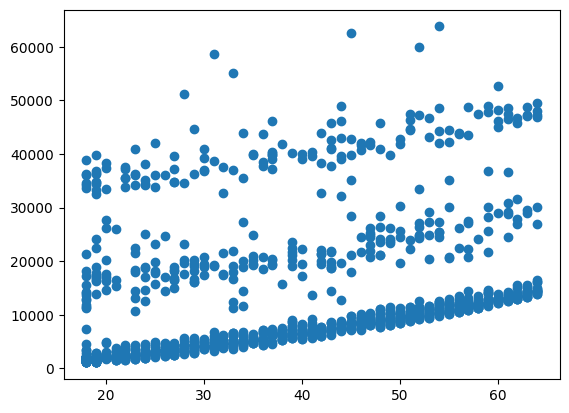

In [59]:
import matplotlib.pyplot as plt

# Task 2: scatter plots of relationships between variables and charges 

df = insurance_pos.copy()
plt.scatter(df['age'], df['charges'])

In [254]:
# # Sample data (time in years, population)
# time = np.array([0, 1, 2, 3, 4, 5])
# population = np.array([100, 200, 400, 800, 1600, 3200])


# # Create the scatterplot
# plt.scatter(time, population)

# # Add labels and title
# plt.xlabel("Time (years)")
# plt.ylabel("Population")
# plt.title("Exponential Population Growth")

# # Show the plot
# plt.show()

In [67]:
# Task 3: prepare data for model fitting
# - convert columns to  numerical values
# - break it into a one-hot encoding

df_new = pd.get_dummies(df, prefix = ['region'], columns = ['region'], dtype = int)

# df['region'].value_counts()

df_new = df_new.drop(columns = ['region_southeast'])

df_new['smoker'] = df_new['smoker'].astype('int64')

df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')

df_new = df_new.drop(columns = ['sex'])

df_new = df_new.dropna()
df_new.head()


,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
0,19.0,27.900,0.0,1,16884.92400,0,0,1,0
1,18.0,33.770,1.0,0,1725.55230,0,0,0,1
2,28.0,33.000,3.0,0,4449.46200,0,0,0,1
3,33.0,22.705,0.0,0,21984.47061,0,1,0,1
4,32.0,28.880,0.0,0,3866.85520,0,1,0,1


In [85]:
# Task 4: fit linear regression model to our data

# input and output variable
X = df_new.drop(columns = ['charges'])
y = df_new['charges']

print(y.info())

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# calculate mean_squared_error

r2 = r2_score(y_test, y_pred)

# output for mse
r2

<class 'pandas.core.series.Series'>
Index: 1207 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1207 non-null   float64
dtypes: float64(1)
memory usage: 18.9 KB
None


0.7049323160872818

In [97]:
def preprocess_df(df):
    df_new = pd.get_dummies(df, prefix = ['region'], columns = ['region'], dtype = int)

    # df['region'].value_counts()

    df_new = df_new.drop(columns = ['region_southeast'])

    df_new['smoker'] = (df_new['smoker'] == 'yes')

    df_new['smoker'] = df_new['smoker'].astype('int64')

    df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')

    df_new = df_new.drop(columns = ['sex'])

    return df_new

In [102]:
# implement model creation and training here

# see how model performs on validation dataset
# create helper function to preproces dataframe
val_df = pd.read_csv('validation_dataset.csv')

input_df = preprocess_df(val_df)

predictions = model.predict(input_df)

predictions_new = [x if x > 0 else 1000 for x in predictions]

validation_data = val_df.copy()

validation_data['predicted_charges'] = predictions_new

validation_data

,age,sex,bmi,children,smoker,region,predicted_charges
0,18.0,female,24.090000,1.0,no,southeast,352.537878
1,39.0,male,26.410000,0.0,yes,northeast,30956.214707
2,27.0,male,29.150000,0.0,yes,southeast,27799.409607
3,71.0,male,65.502135,13.0,yes,southeast,57194.414804
4,28.0,male,38.060000,0.0,no,southeast,6685.426312
5,70.0,female,72.958351,11.0,yes,southeast,58677.838443
6,29.0,female,32.110000,2.0,no,northwest,7044.405963
7,42.0,female,41.325000,1.0,no,northeast,13065.658004
8,48.0,female,36.575000,0.0,no,northwest,12665.703636
9,63.0,male,33.660000,3.0,no,southeast,16142.541083
